   # STOCK PRICE PREDICTION USING MACHINE LEARNING [LSTM]


<img src="sm3.jpg" style ="width:700px; height:350px "/>

# Project Objective :-

###  AIM : To predict the future closing value of a given stock across a given period of time using Machine Learning Technique
                      

## Importing Required Libraries:

Firstly , we are installing the required libraries for our project and importing them in the Jupyter notebook



In [1]:
#Importing the Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

## Collecting Dataset 

In this step we have downloaded the "ITC" companies dataset from Kaggle Website and imported it into our Notebook using Pandas Library

In [2]:
#Converting CSV file into a dataframe

df = pd.read_csv("itc_dataset.csv")

In [3]:
#View of the entire data

df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ITC,EQ,656.00,694.00,708.50,675.00,708.50,708.50,701.81,562715,3.949174e+13,NaN,NaN,NaN
1,2000-01-04,ITC,EQ,708.50,714.00,729.00,694.30,710.65,712.35,714.16,712637,5.089379e+13,NaN,NaN,NaN
2,2000-01-05,ITC,EQ,712.35,716.25,758.90,660.00,731.00,726.20,732.43,1382149,1.012325e+14,NaN,NaN,NaN
3,2000-01-06,ITC,EQ,726.20,741.00,784.30,741.00,784.30,784.30,776.63,721618,5.604266e+13,NaN,NaN,NaN
4,2000-01-07,ITC,EQ,784.30,832.40,847.05,824.00,847.05,847.05,841.25,231209,1.945046e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,ITC,EQ,205.35,205.80,206.75,204.70,205.50,205.30,205.64,19886214,4.089370e+14,103777.0,11449231.0,0.5757
5302,2021-04-27,ITC,EQ,205.30,205.30,206.95,205.05,205.50,205.40,205.85,11444814,2.355887e+14,94890.0,4863874.0,0.4250
5303,2021-04-28,ITC,EQ,205.40,206.00,206.50,205.30,205.65,205.50,205.96,12708021,2.617327e+14,69476.0,7221020.0,0.5682
5304,2021-04-29,ITC,EQ,205.50,207.10,207.55,204.05,204.40,204.30,205.37,13096755,2.689642e+14,95800.0,5887019.0,0.4495


In [4]:
pd.options.mode.chained_assignment = None

## Data Cleaning and Data Discretization 

In this step we are removing the data that is not required for our analysis and checking the integrity of Data

In [5]:
#Dropping Unnecessary columns

df.drop(["Symbol","Prev Close","Series","Last","Turnover","Trades","Deliverable Volume","%Deliverble"],inplace = True , axis = 1)

In [6]:
df

,Date,Open,High,Low,Close,VWAP,Volume
0,2000-01-03,694.00,708.50,675.00,708.50,701.81,562715
1,2000-01-04,714.00,729.00,694.30,712.35,714.16,712637
2,2000-01-05,716.25,758.90,660.00,726.20,732.43,1382149
3,2000-01-06,741.00,784.30,741.00,784.30,776.63,721618
4,2000-01-07,832.40,847.05,824.00,847.05,841.25,231209
...,...,...,...,...,...,...,...
5301,2021-04-26,205.80,206.75,204.70,205.30,205.64,19886214
5302,2021-04-27,205.30,206.95,205.05,205.40,205.85,11444814
5303,2021-04-28,206.00,206.50,205.30,205.50,205.96,12708021
5304,2021-04-29,207.10,207.55,204.05,204.30,205.37,13096755


In [7]:
#Basic Information about Columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5306 non-null   object 
 1   Open    5306 non-null   float64
 2   High    5306 non-null   float64
 3   Low     5306 non-null   float64
 4   Close   5306 non-null   float64
 5   VWAP    5306 non-null   float64
 6   Volume  5306 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 290.3+ KB


In [8]:
#Statistical Information of data

df.describe()

,Open,High,Low,Close,VWAP,Volume
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03
mean,420.631511,426.629061,414.241538,420.273690,420.522927,7.173165e+06
std,328.240059,333.333043,323.333442,328.165405,328.435808,9.613497e+06
min,115.000000,116.200000,114.400000,115.450000,115.390000,6.797000e+03
25%,202.000000,204.500000,198.500000,201.650000,201.705000,1.038020e+06
50%,280.200000,283.000000,277.025000,280.025000,280.055000,5.122630e+06
75%,630.975000,640.000000,623.500000,631.362500,631.727500,8.788539e+06
max,1946.000000,1964.800000,1916.300000,1940.100000,1933.790000,1.494797e+08


In [9]:
#Checking if there are any Null or NA values 

df.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
VWAP      False
Volume    False
dtype: bool

In [10]:
#Creating a copy of the dataframe

dataframe_copy = df.copy()

In [11]:
#Slicing out only required records after the Stocksplit happened 

itc_df = dataframe_copy.loc[4111:5306]

In [12]:
itc_df

,Date,Open,High,Low,Close,VWAP,Volume
4111,2016-07-01,243.30,259.75,242.60,252.35,253.10,27944232
4112,2016-07-04,254.00,254.00,244.00,244.90,246.64,13996866
4113,2016-07-05,245.85,247.00,242.20,243.55,243.88,8989659
4114,2016-07-07,244.50,248.65,243.90,247.00,245.97,8960871
4115,2016-07-08,247.40,247.40,242.50,245.85,244.63,6899736
...,...,...,...,...,...,...,...
5301,2021-04-26,205.80,206.75,204.70,205.30,205.64,19886214
5302,2021-04-27,205.30,206.95,205.05,205.40,205.85,11444814
5303,2021-04-28,206.00,206.50,205.30,205.50,205.96,12708021
5304,2021-04-29,207.10,207.55,204.05,204.30,205.37,13096755


In [13]:
#Resetting the Index to 'Date'

itc_df.set_index(["Date"],inplace = True)

In [14]:
itc_df

,Open,High,Low,Close,VWAP,Volume
Date,,,,,,
2016-07-01,243.30,259.75,242.60,252.35,253.10,27944232
2016-07-04,254.00,254.00,244.00,244.90,246.64,13996866
2016-07-05,245.85,247.00,242.20,243.55,243.88,8989659
2016-07-07,244.50,248.65,243.90,247.00,245.97,8960871
2016-07-08,247.40,247.40,242.50,245.85,244.63,6899736
...,...,...,...,...,...,...
2021-04-26,205.80,206.75,204.70,205.30,205.64,19886214
2021-04-27,205.30,206.95,205.05,205.40,205.85,11444814
2021-04-28,206.00,206.50,205.30,205.50,205.96,12708021


In [15]:
itc_df['Date'] = pd.to_datetime(itc_df.index)


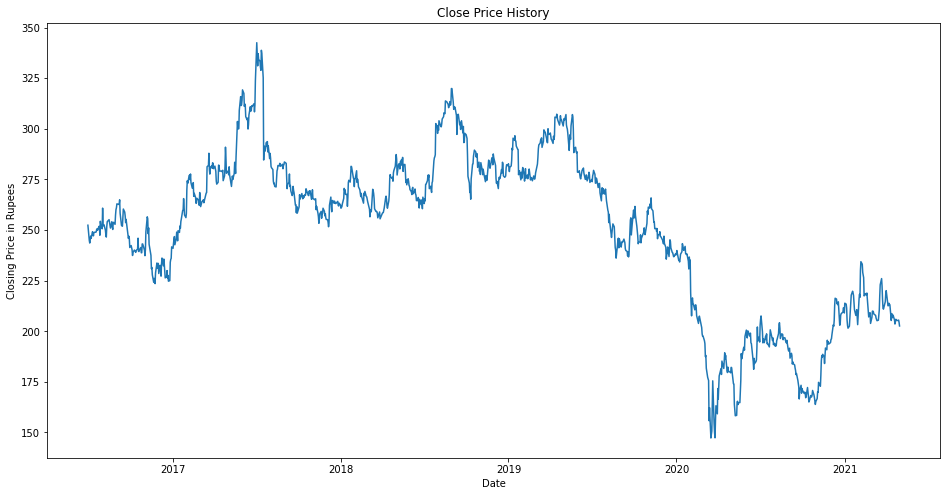

In [16]:
#Plotting Close Price History

plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(itc_df.Date,itc_df.Close)
plt.xlabel("Date")
plt.ylabel("Closing Price in Rupees")
plt.show()

# Feature Selection

In this Project we selected 'Close' price as a feature as we have to predict Closing price of the stock

In [17]:
#Create a new dataframe with only "Close Price"

data = itc_df.filter(["Close"])

In [18]:
data

,Close
Date,
2016-07-01,252.35
2016-07-04,244.90
2016-07-05,243.55
2016-07-07,247.00
2016-07-08,245.85
...,...
2021-04-26,205.30
2021-04-27,205.40
2021-04-28,205.50


In [19]:
#Converting dataframe into numpy array

dataset = data.values

In [20]:
dataset

array([[252.35],
       [244.9 ],
       [243.55],
       ...,
       [205.5 ],
       [204.3 ],
       [202.6 ]])

#  Data Preprocessing

After the dataset is transformed into a clean dataset, the dataset is divided into training and testing sets so as to evaluate.

In [21]:
#Scaling the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [22]:
scaled_data

array([[0.53828425],
       [0.50012804],
       [0.49321383],
       ...,
       [0.29833547],
       [0.2921895 ],
       [0.28348271]])

In [23]:
#Training data split

training_data_len = math.ceil(len(dataset) *.80)

In [24]:
training_data_len

956

In [25]:
#Creating the scaled training data set

train_data = scaled_data[0:training_data_len ,:]
train_data


array([[5.38284251e-01],
       [5.00128041e-01],
       [4.93213828e-01],
       [5.10883483e-01],
       [5.04993598e-01],
       [5.21895006e-01],
       [5.18053777e-01],
       [5.11395647e-01],
       [5.19590269e-01],
       [5.20358515e-01],
       [5.20614597e-01],
       [5.21382843e-01],
       [5.27528809e-01],
       [5.29321383e-01],
       [5.25480154e-01],
       [5.35211268e-01],
       [5.35211268e-01],
       [5.12932138e-01],
       [5.48271447e-01],
       [5.38796415e-01],
       [5.29321383e-01],
       [5.81562100e-01],
       [5.40076825e-01],
       [5.37003841e-01],
       [5.39308579e-01],
       [5.25992318e-01],
       [5.14212548e-01],
       [5.08322663e-01],
       [5.34699104e-01],
       [5.47247119e-01],
       [5.52368758e-01],
       [5.45198464e-01],
       [5.37259923e-01],
       [5.31113956e-01],
       [5.47247119e-01],
       [5.33418694e-01],
       [5.27528809e-01],
       [5.43918054e-01],
       [5.45710627e-01],
       [5.40588988e-01],


In [26]:
len(train_data)

956

In [27]:
#Splitting into x_train and y_train datasets
x_train = []
y_train = []

for i in range(100,len(train_data)):
    x_train.append(train_data[i-100:i ,0])
    y_train.append(train_data[i,0])

In [28]:
#Converting datasets into numpy arrays

x_train , y_train = np.array(x_train),np.array(y_train)

In [29]:
x_train

array([[0.53828425, 0.50012804, 0.49321383, ..., 0.39052497, 0.41766965,
        0.44276569],
       [0.50012804, 0.49321383, 0.51088348, ..., 0.41766965, 0.44276569,
        0.42919334],
       [0.49321383, 0.51088348, 0.5049936 , ..., 0.44276569, 0.42919334,
        0.43661972],
       ...,
       [0.48040973, 0.50140845, 0.49731114, ..., 0.05736236, 0.09116517,
        0.09295775],
       [0.50140845, 0.49731114, 0.4809219 , ..., 0.09116517, 0.09295775,
        0.08476312],
       [0.49731114, 0.4809219 , 0.46939821, ..., 0.09295775, 0.08476312,
        0.08911652]])

In [30]:
y_train

array([4.29193342e-01, 4.36619718e-01, 4.41741357e-01, 4.16133163e-01,
       4.36875800e-01, 4.24839949e-01, 4.09475032e-01, 4.40717029e-01,
       4.55313700e-01, 4.35595391e-01, 4.52752881e-01, 4.39948784e-01,
       4.22279129e-01, 4.05121639e-01, 4.08450704e-01, 4.23559539e-01,
       4.04865557e-01, 4.11267606e-01, 3.96670935e-01, 3.98207426e-01,
       4.44558259e-01, 4.51728553e-01, 4.54545455e-01, 4.83482714e-01,
       4.79897567e-01, 4.92189501e-01, 5.02944942e-01, 5.09603073e-01,
       4.88860435e-01, 5.04993598e-01, 5.20870679e-01, 5.13700384e-01,
       4.98847631e-01, 5.24455826e-01, 5.20102433e-01, 5.36235595e-01,
       5.30601793e-01, 5.47503201e-01, 5.53905250e-01, 5.75672215e-01,
       5.76696543e-01, 6.05633803e-01, 5.64148528e-01, 5.57490397e-01,
       5.67733675e-01, 6.27144686e-01, 6.50704225e-01, 6.44302177e-01,
       6.63508323e-01, 6.65044814e-01, 6.53265045e-01, 6.67861716e-01,
       6.45838668e-01, 6.31754161e-01, 6.32778489e-01, 6.46094750e-01,
      

In [31]:
x_train.shape ,y_train.shape

((856, 100), (856,))

In [32]:
#Reshaping the data

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# Building LSTM Model

In [33]:
#Building LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# Training the Model

In [34]:
#Training the Model

model.fit(x_train , y_train,batch_size=64,epochs=500)

Epoch 1/500
14/14 [==============================] - 7s 157ms/step - loss: 0.0953
Epoch 2/500
14/14 [==============================] - 2s 159ms/step - loss: 0.0124
Epoch 3/500
14/14 [==============================] - 2s 152ms/step - loss: 0.0063
Epoch 4/500
14/14 [==============================] - 2s 147ms/step - loss: 0.0045
Epoch 5/500
14/14 [==============================] - 2s 144ms/step - loss: 0.0037
Epoch 6/500
14/14 [==============================] - 2s 149ms/step - loss: 0.0032
Epoch 7/500
14/14 [==============================] - 2s 144ms/step - loss: 0.0027
Epoch 8/500
14/14 [==============================] - 2s 147ms/step - loss: 0.0024
Epoch 9/500
14/14 [==============================] - 2s 149ms/step - loss: 0.0023
Epoch 10/500
14/14 [==============================] - 2s 152ms/step - loss: 0.0022
Epoch 11/500
14/14 [==============================] - 2s 145ms/step - loss: 0.0021
Epoch 12/500
14/14 [==============================] - 2s 148ms/step - loss: 0.0021
Epoch 13/500


14/14 [==============================] - 2s 149ms/step - loss: 7.2858e-04
Epoch 99/500
14/14 [==============================] - 2s 150ms/step - loss: 7.2849e-04
Epoch 100/500
14/14 [==============================] - 2s 148ms/step - loss: 7.2402e-04
Epoch 101/500
14/14 [==============================] - 2s 151ms/step - loss: 7.2186e-04
Epoch 102/500
14/14 [==============================] - 2s 144ms/step - loss: 6.7444e-04
Epoch 103/500
14/14 [==============================] - 2s 147ms/step - loss: 6.9777e-04
Epoch 104/500
14/14 [==============================] - 2s 153ms/step - loss: 6.9092e-04
Epoch 105/500
14/14 [==============================] - 2s 151ms/step - loss: 6.8564e-04
Epoch 106/500
14/14 [==============================] - 2s 145ms/step - loss: 7.1719e-04
Epoch 107/500
14/14 [==============================] - 2s 149ms/step - loss: 6.8948e-04
Epoch 108/500
14/14 [==============================] - 2s 152ms/step - loss: 6.9418e-04
Epoch 109/500
14/14 [==========================

14/14 [==============================] - 2s 155ms/step - loss: 4.9750e-04
Epoch 192/500
14/14 [==============================] - 2s 159ms/step - loss: 6.1757e-04
Epoch 193/500
14/14 [==============================] - 2s 155ms/step - loss: 5.3428e-04
Epoch 194/500
14/14 [==============================] - 2s 159ms/step - loss: 5.0024e-04
Epoch 195/500
14/14 [==============================] - 2s 159ms/step - loss: 5.0464e-04
Epoch 196/500
14/14 [==============================] - 2s 160ms/step - loss: 5.1163e-04
Epoch 197/500
14/14 [==============================] - 2s 158ms/step - loss: 5.0257e-04
Epoch 198/500
14/14 [==============================] - 2s 156ms/step - loss: 4.8999e-04
Epoch 199/500
14/14 [==============================] - 2s 159ms/step - loss: 5.3375e-04
Epoch 200/500
14/14 [==============================] - 2s 169ms/step - loss: 5.4480e-04
Epoch 201/500
14/14 [==============================] - 2s 156ms/step - loss: 5.2070e-04
Epoch 202/500
14/14 [=========================

14/14 [==============================] - 2s 143ms/step - loss: 4.8192e-04
Epoch 284/500
14/14 [==============================] - 2s 147ms/step - loss: 5.5229e-04
Epoch 285/500
14/14 [==============================] - 2s 146ms/step - loss: 4.7833e-04
Epoch 286/500
14/14 [==============================] - 2s 143ms/step - loss: 5.0918e-04
Epoch 287/500
14/14 [==============================] - 2s 147ms/step - loss: 4.8978e-04
Epoch 288/500
14/14 [==============================] - 2s 148ms/step - loss: 4.7381e-04
Epoch 289/500
14/14 [==============================] - 2s 149ms/step - loss: 4.9634e-04
Epoch 290/500
14/14 [==============================] - 2s 151ms/step - loss: 4.9313e-04
Epoch 291/500
14/14 [==============================] - 2s 147ms/step - loss: 4.9307e-04
Epoch 292/500
14/14 [==============================] - 2s 144ms/step - loss: 5.4084e-04
Epoch 293/500
14/14 [==============================] - 2s 146ms/step - loss: 4.8197e-04
Epoch 294/500
14/14 [=========================

14/14 [==============================] - 3s 199ms/step - loss: 5.3747e-04
Epoch 377/500
14/14 [==============================] - 2s 157ms/step - loss: 4.7403e-04
Epoch 378/500
14/14 [==============================] - 2s 149ms/step - loss: 4.7935e-04
Epoch 379/500
14/14 [==============================] - 2s 149ms/step - loss: 4.7101e-04
Epoch 380/500
14/14 [==============================] - 2s 150ms/step - loss: 4.6699e-04
Epoch 381/500
14/14 [==============================] - 2s 144ms/step - loss: 5.5155e-04
Epoch 382/500
14/14 [==============================] - 2s 150ms/step - loss: 4.9686e-04
Epoch 383/500
14/14 [==============================] - 2s 149ms/step - loss: 4.9053e-04
Epoch 384/500
14/14 [==============================] - 2s 150ms/step - loss: 4.7567e-04
Epoch 385/500
14/14 [==============================] - 2s 150ms/step - loss: 4.6717e-04
Epoch 386/500
14/14 [==============================] - 2s 162ms/step - loss: 4.8295e-04
Epoch 387/500
14/14 [=========================

14/14 [==============================] - 2s 149ms/step - loss: 4.9267e-04
Epoch 470/500
14/14 [==============================] - 2s 151ms/step - loss: 4.6356e-04
Epoch 471/500
14/14 [==============================] - 2s 147ms/step - loss: 4.6464e-04
Epoch 472/500
14/14 [==============================] - 2s 149ms/step - loss: 4.6929e-04
Epoch 473/500
14/14 [==============================] - 2s 146ms/step - loss: 4.8380e-04
Epoch 474/500
14/14 [==============================] - 2s 147ms/step - loss: 4.6823e-04
Epoch 475/500
14/14 [==============================] - 2s 148ms/step - loss: 5.1290e-04
Epoch 476/500
14/14 [==============================] - 2s 147ms/step - loss: 4.6169e-04
Epoch 477/500
14/14 [==============================] - 2s 148ms/step - loss: 4.7654e-04
Epoch 478/500
14/14 [==============================] - 2s 148ms/step - loss: 4.7169e-04
Epoch 479/500
14/14 [==============================] - 2s 147ms/step - loss: 4.6539e-04
Epoch 480/500
14/14 [=========================

#  Test Dataset Update

In [35]:
#Creating the testing data set
test_data = scaled_data[training_data_len-100:,:]

len(test_data)

339

In [36]:
#Creating the x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(100,len(test_data)):
    x_test.append(test_data[i-100:i,0])

In [37]:
#Converting test data into numpy array

x_test =np.array(x_test)

In [38]:
x_test

array([[0.4809219 , 0.46939821, 0.46862996, ..., 0.08476312, 0.08911652,
        0.08962868],
       [0.46939821, 0.46862996, 0.45864277, ..., 0.08911652, 0.08962868,
        0.12035851],
       [0.46862996, 0.45864277, 0.45915493, ..., 0.08962868, 0.12035851,
        0.14596671],
       ...,
       [0.23764405, 0.24148528, 0.24942382, ..., 0.29756722, 0.29731114,
        0.2978233 ],
       [0.24148528, 0.24942382, 0.25070423, ..., 0.29731114, 0.2978233 ,
        0.29833547],
       [0.24942382, 0.25070423, 0.2609475 , ..., 0.2978233 , 0.29833547,
        0.2921895 ]])

In [39]:
x_test.shape

(239, 100)

In [40]:
y_test

array([[170.75],
       [175.75],
       [188.95],
       [186.35],
       [191.7 ],
       [192.15],
       [190.65],
       [197.35],
       [200.55],
       [197.25],
       [196.7 ],
       [200.15],
       [200.  ],
       [197.65],
       [198.5 ],
       [199.05],
       [194.25],
       [193.9 ],
       [187.2 ],
       [185.  ],
       [181.2 ],
       [186.6 ],
       [184.05],
       [185.  ],
       [185.85],
       [191.85],
       [202.1 ],
       [195.2 ],
       [197.25],
       [194.65],
       [202.9 ],
       [205.85],
       [207.55],
       [199.8 ],
       [194.25],
       [196.3 ],
       [195.45],
       [194.35],
       [197.55],
       [195.9 ],
       [198.7 ],
       [193.85],
       [194.05],
       [192.7 ],
       [192.25],
       [196.55],
       [200.7 ],
       [199.6 ],
       [196.4 ],
       [195.4 ],
       [196.7 ],
       [193.35],
       [194.15],
       [192.6 ],
       [193.65],
       [192.8 ],
       [195.35],
       [196.05],
       [198.85

In [41]:
y_test.shape

(239, 1)

In [42]:
y_train = y_train.reshape(-1,1)
y_train = scaler.inverse_transform(y_train)

y_train

array([[231.05],
       [232.5 ],
       [233.5 ],
       [228.5 ],
       [232.55],
       [230.2 ],
       [227.2 ],
       [233.3 ],
       [236.15],
       [232.3 ],
       [235.65],
       [233.15],
       [229.7 ],
       [226.35],
       [227.  ],
       [229.95],
       [226.3 ],
       [227.55],
       [224.7 ],
       [225.  ],
       [234.05],
       [235.45],
       [236.  ],
       [241.65],
       [240.95],
       [243.35],
       [245.45],
       [246.75],
       [242.7 ],
       [245.85],
       [248.95],
       [247.55],
       [244.65],
       [249.65],
       [248.8 ],
       [251.95],
       [250.85],
       [254.15],
       [255.4 ],
       [259.65],
       [259.85],
       [265.5 ],
       [257.4 ],
       [256.1 ],
       [258.1 ],
       [269.7 ],
       [274.3 ],
       [273.05],
       [276.8 ],
       [277.1 ],
       [274.8 ],
       [277.65],
       [273.35],
       [270.6 ],
       [270.8 ],
       [273.4 ],
       [266.65],
       [268.15],
       [266.05

In [43]:
y_train.shape

(856, 1)

In [44]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# Predicting Test Values Using Model

In [45]:
#Getting predicted values of x_test using the model

train_predictions = model.predict(x_train)
train_predictions = scaler.inverse_transform(train_predictions)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [46]:
predictions

array([[165.02948],
       [169.4086 ],
       [174.39369],
       [185.63576],
       [186.79771],
       [191.25926],
       [192.5377 ],
       [191.48907],
       [196.33267],
       [199.5819 ],
       [197.2959 ],
       [196.21852],
       [198.4907 ],
       [198.49966],
       [196.4138 ],
       [196.5587 ],
       [196.86205],
       [192.96437],
       [191.913  ],
       [186.36932],
       [183.51785],
       [179.95888],
       [183.19548],
       [182.10187],
       [182.75519],
       [183.7411 ],
       [188.79031],
       [198.3164 ],
       [194.96133],
       [196.31055],
       [194.51602],
       [200.89201],
       [204.42271],
       [206.47963],
       [200.3359 ],
       [194.8155 ],
       [195.25291],
       [194.32114],
       [193.09795],
       [195.30605],
       [194.32907],
       [196.42204],
       [192.93787],
       [192.51411],
       [191.34526],
       [190.772  ],
       [194.09007],
       [198.14613],
       [198.14731],
       [195.70764],


In [47]:
predictions.shape

(239, 1)

In [48]:
train_predictions

array([[231.68976],
       [229.93492],
       [231.46909],
       [232.61902],
       [228.22435],
       [231.7099 ],
       [229.64558],
       [226.78065],
       [232.01588],
       [234.83179],
       [231.50922],
       [234.49117],
       [232.2677 ],
       [229.00835],
       [225.68268],
       [225.85655],
       [228.33797],
       [225.15256],
       [226.07582],
       [223.52975],
       [223.60835],
       [231.76678],
       [233.74564],
       [234.67368],
       [240.2216 ],
       [239.96611],
       [242.46416],
       [244.62074],
       [245.99417],
       [242.22491],
       [245.17052],
       [248.01686],
       [246.6878 ],
       [243.95174],
       [248.62657],
       [247.7491 ],
       [250.84688],
       [249.83069],
       [253.13063],
       [254.38658],
       [258.66498],
       [258.9407 ],
       [264.72128],
       [256.71518],
       [255.95792],
       [257.74417],
       [268.94284],
       [273.1847 ],
       [272.10648],
       [276.32834],


In [49]:
train_predictions.shape

(856, 1)

# Error Calculation

In [50]:
train_rmse = np.sqrt(np.mean(np.power(((y_train)-(train_predictions)),2)))

train_rmse

4.231332543345958

In [51]:
# Calculating Root Mean Square Percentage Error
train_rmspe = (np.sqrt(np.mean(np.square((y_train - train_predictions) / y_train)))) *100 

train_rmspe

1.730317620623075

In [52]:
#Calculating Mean Absolute Error 
train_MAE = abs(np.mean((y_train)-(train_predictions)))

train_MAE

0.8213610854104294

In [53]:
train_Error =abs(np.mean(((y_train - train_predictions) / y_train))*100)

train_Error

0.2722073085996066

In [54]:
#Calculating Root Mean Square Error Value 


test_rmse = np.sqrt(np.mean(np.power(((y_test)-(predictions)),2)))

test_rmse

3.868324072135856

In [55]:
# Calculating Root Mean Square Percentage Error
test_rmspe = (np.sqrt(np.mean(np.square((y_test - predictions) / y_test)))) *100 

test_rmspe

1.9198856010855463

In [56]:
#Calculating Mean Absolute Error 
test_MAE = abs(np.mean((y_test)-(predictions)))

test_MAE

1.3334738503938934

In [57]:
test_Error =abs(np.mean(((y_test - predictions) / y_test))*100)

test_Error

0.6517770300685952

# Visualisation of Output

In [58]:
#Plotting the Data

train = data[:training_data_len]

valid = data[training_data_len:]
valid["Predictions"] = predictions



In [59]:
valid

,Close,Predictions
Date,,
2020-05-19,170.75,165.029480
2020-05-20,175.75,169.408600
2020-05-21,188.95,174.393692
2020-05-22,186.35,185.635757
2020-05-26,191.70,186.797714
...,...,...
2021-04-26,205.30,203.841125
2021-04-27,205.40,203.855927
2021-04-28,205.50,204.006302


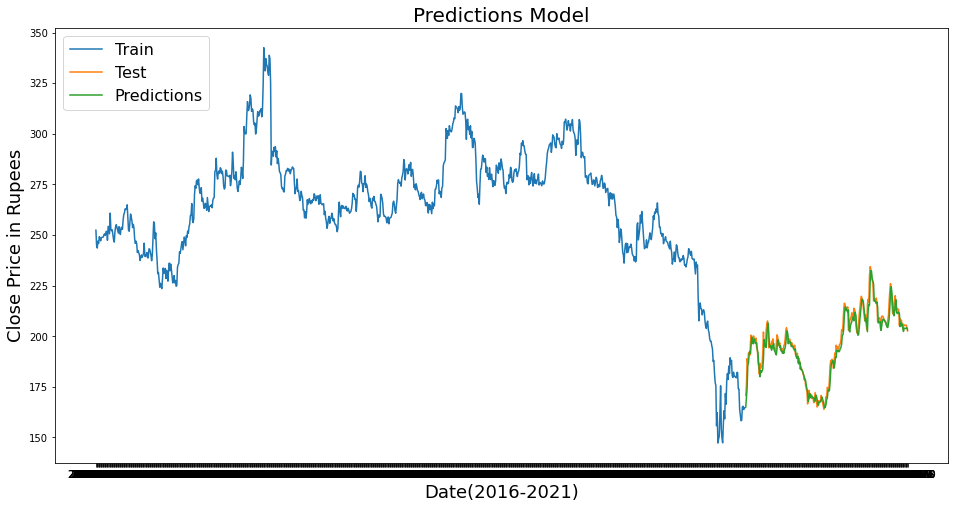

In [60]:
#Visualising the entire Data

plt.figure(figsize=(16,8))
plt.title("Predictions Model", fontsize = 20)
plt.xlabel("Date(2016-2021)" , fontsize=18)
plt.ylabel("Close Price in Rupees" , fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Train","Test","Predictions"] ,loc="upper left",fontsize=16)
plt.show()

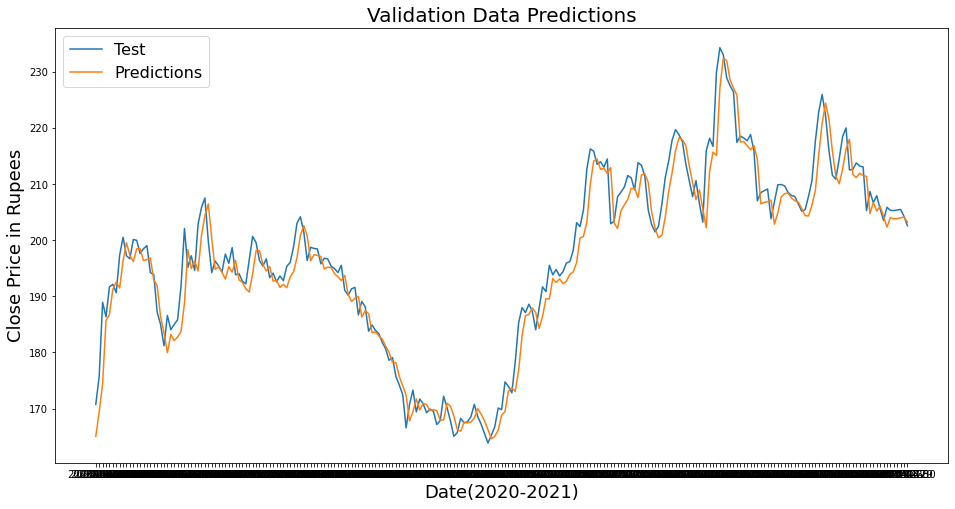

In [61]:
# Visualising the Validation Dataset Predictions 

plt.figure(figsize=(16,8))
plt.title("Validation Data Predictions", fontsize = 20)
plt.xlabel("Date(2020-2021)",fontsize=18)
plt.ylabel("Close Price in Rupees" , fontsize = 18)
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Test","Predictions"] ,loc="upper left",fontsize=16)
plt.show()

# Predicting Future Values

In [62]:
len(test_data)

339

In [63]:
x_input=test_data[239:].reshape(1,-1)
x_input.shape


(1, 100)

In [64]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

temp_input



[0.2507042253521127,
 0.26094750320102433,
 0.28629961587708064,
 0.2827144686299615,
 0.2978233034571064,
 0.3352112676056337,
 0.35364916773367494,
 0.35160051216389243,
 0.3395646606914212,
 0.34186939820742646,
 0.33700384122919347,
 0.3444302176696542,
 0.2852752880921895,
 0.28758002560819473,
 0.3098591549295774,
 0.3142125480153649,
 0.31882202304737517,
 0.32932138284250956,
 0.32727272727272727,
 0.3162612035851472,
 0.34110115236875804,
 0.3387964148527528,
 0.3288092189500639,
 0.2978233034571064,
 0.2845070422535211,
 0.27784891165172854,
 0.2829705505761845,
 0.30320102432778484,
 0.32778489116517295,
 0.34263764404609487,
 0.36158770806658136,
 0.37131882202304733,
 0.3667093469910371,
 0.3605633802816902,
 0.34033290653008963,
 0.32496798975672203,
 0.31011523687580034,
 0.3247119078104993,
 0.30396927016645325,
 0.2868117797695263,
 0.35185659411011516,
 0.3633802816901407,
 0.35595390524967996,
 0.42355953905249677,
 0.4460947503201024,
 0.43969270166453256,
 0.418693

In [ ]:
#Prediction  for next 5 days

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<5):
    
    if(len(temp_input)>100):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
    
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
    
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
lst_output = scaler.inverse_transform(lst_output)

lst_output

# Actual Future Values

In [ ]:
#Actual Future Stock Values

future_values_df = pd.read_csv("ITC.NS.csv")
fut_df = future_values_df[116:121]
fut_df

In [ ]:
fut_df.set_index(["Date"],inplace = True)
fut_data = fut_df.filter(["Close"])
fut_data

In [ ]:
next_5_days = fut_data[:]

next_5_days

In [ ]:
Error =abs(np.mean(((next_5_days - lst_output) / next_5_days))*100)

Error

# Comparing Future Values

In [ ]:
future = fut_data[:]

future["Prediction"] = lst_output

future